### Packages

In [1]:
try:
  import gi
  gi.require_version('NumCosmo', '1.0')
  gi.require_version('NumCosmoMath', '1.0')
except:
  pass

from gi.repository import GObject
from gi.repository import NumCosmo as Nc
from gi.repository import NumCosmoMath as Ncm

import matplotlib.pyplot as plt
import scipy
import numpy as np

### Data

In [2]:
Ncm.cfg_init ()  #Initialize NumCosmo, must be placed before any function
cosmo = Nc.HICosmoDEXcdm() #Cosmology object (Homogeneous and Isotropic)

mset = Ncm.MSet () 
mset.set (cosmo) 

#Parameters to be fitted
cosmo.props.Omegac_fit = True
cosmo.props.Omegax_fit = True
cosmo.props.H0_fit = True

dist = Nc.Distance (zf = 2.0) #Distance object

snia = Nc.DataDistMu.new_from_id (dist, Nc.DataSNIAId.SIMPLE_UNION2_1) #Data Object

dset = Ncm.Dataset ()
dset.append_data (snia) #New dataset with snia set

snia.props.w_mean = False

### C) 2$\sigma$ confidence region

In [3]:
#Likelihood from the dataset
lh = Ncm.Likelihood (dataset = dset)

fit = Ncm.Fit.new (Ncm.FitType.NLOPT, "ln-neldermead", lh, mset, Ncm.FitGradType.NUMDIFF_FORWARD)#Fit object of type NLOPT
fit.run (Ncm.FitRunMsgs.SIMPLE) #Printing messages from the fitter
fit.numdiff_m2lnL_covar () #parameters covariance

#PIndex indicating which parameter we are going to study
p1 = Ncm.MSetPIndex.new (cosmo.id (), Nc.HICosmoDESParams.OMEGA_C)
p2 = Ncm.MSetPIndex.new (cosmo.id (), Nc.HICosmoDESParams.H0)

#Likelihood ratio test object
lhr2d = Ncm.LHRatio2d.new (fit, p1, p2, 1.0e-2)

#Confidance Region (from likelihood ratio test), for 2 sigma we have 0.955.
cr_rg = lhr2d.conf_region (0.955, 300.0, Ncm.FitRunMsgs.SIMPLE)

cr_p1array = cr_rg.p1.dup_array ()
cr_p2array = cr_rg.p2.dup_array ()

#----------------------------------------------------------------------------------
# Model fitting. Interating using:
#  - solver:            NLOpt:ln-neldermead
#  - differentiation:   Numerical differentiantion (forward)
#..................
#  Minimum found with precision: |df|/f =  1.00000e-08 and |dx| =  1.00000e-05
#  Elapsed time: 00 days, 00:00:00.3690150
#  iteration            [000098]
#  function evaluations [000100]
#  gradient evaluations [000000]
#  degrees of freedom   [000577]
#  m2lnL     =     562.226143365495 (     562.22614 )
#  Fit parameters:
#     70.0087482847575     0.235810227915       0.725105078674723   
#----------------------------------------------------------------------------------
# Likelihood ratio confidence region at 95.500%, bestfit [  0.23581023    70.008748]:
#
#  looking root in interval [           0    2.4904188]:
#..
#  root found at    2.4708908 with precision 1.00000000e-02.
#  border found at    2.4708908.
#.
#  looking root in interval [ 

#..
#  root found at    9.0721806 with precision 1.00000000e-02.
#  looking root in interval [   8.2867825    9.8575788]:
#..
#  root found at    9.0914068 with precision 1.00000000e-02.
#  looking root in interval [   8.3060087     9.876805]:
#..
#  root found at    9.1108044 with precision 1.00000000e-02.
#  looking root in interval [   8.3254063    9.8962026]:
#..
#  root found at    9.1304928 with precision 1.00000000e-02.
#  looking root in interval [   8.3450946    9.9158909]:
#..
#  root found at    9.1503406 with precision 1.00000000e-02.
#  looking root in interval [   8.3649424    9.9357388]:
#..
#  root found at    9.1704277 with precision 1.00000000e-02.
#  looking root in interval [   8.3850295    9.9558259]:
#..
#  root found at    9.1907516 with precision 1.00000000e-02.
#  looking root in interval [   8.4053534    9.9761497]:
#..
#  root found at    9.2113144 with precision 1.00000000e-02.
#  looking root in interval [   8.4259162    9.9967126]:
#..
#  root found at    

#  looking root in interval [   9.7950621    11.365858]:
#..
#  root found at     10.59903 with precision 1.00000000e-02.
#  looking root in interval [   9.8136315    11.384428]:
#..
#  root found at    10.617431 with precision 1.00000000e-02.
#  looking root in interval [   9.8320326    11.402829]:
#..
#  root found at    10.635695 with precision 1.00000000e-02.
#  looking root in interval [   9.8502966    11.421093]:
#..
#  root found at    10.653834 with precision 1.00000000e-02.
#  looking root in interval [   9.8684362    11.439233]:
#..
#  root found at    10.671785 with precision 1.00000000e-02.
#  looking root in interval [   9.8863872    11.457183]:
#..
#  root found at    10.689705 with precision 1.00000000e-02.
#  looking root in interval [   9.9043071    11.475103]:
#..
#  root found at    10.707428 with precision 1.00000000e-02.
#  looking root in interval [   9.9220295    11.492826]:
#..
#  root found at    10.725126 with precision 1.00000000e-02.
#  looking root in inter

#..
#  root found at     11.95069 with precision 1.00000000e-02.
#  looking root in interval [   11.165292    12.736088]:
#..
#  root found at    11.976646 with precision 1.00000000e-02.
#  looking root in interval [   11.191247    12.762044]:
#..
#  root found at    12.002063 with precision 1.00000000e-02.
#  looking root in interval [   11.216664    12.787461]:
#..
#  root found at    12.027473 with precision 1.00000000e-02.
#  looking root in interval [   11.242075    12.812871]:
#..
#  root found at    12.052695 with precision 1.00000000e-02.
#  looking root in interval [   11.267297    12.838093]:
#..
#  root found at    12.078136 with precision 1.00000000e-02.
#  looking root in interval [   11.292738    12.863534]:
#..
#  root found at    12.103284 with precision 1.00000000e-02.
#  looking root in interval [   11.317886    12.888683]:
#..
#  root found at    12.130078 with precision 1.00000000e-02.
#  looking root in interval [   11.344679    12.915476]:
#..
#  root found at    

#  looking root in interval [   12.508636    14.079432]:
#..
#  root found at    13.312894 with precision 1.00000000e-02.
#  looking root in interval [   12.527496    14.098292]:
#..
#  root found at     13.33196 with precision 1.00000000e-02.
#  looking root in interval [   12.546562    14.117358]:
#..
#  root found at      13.3513 with precision 1.00000000e-02.
#  looking root in interval [   12.565902    14.136698]:
#..
#  root found at    13.370837 with precision 1.00000000e-02.
#  looking root in interval [   12.585439    14.156235]:
#..
#  root found at    13.390689 with precision 1.00000000e-02.
#  looking root in interval [   12.605291    14.176087]:
#..
#  root found at    13.410713 with precision 1.00000000e-02.
#  looking root in interval [   12.625314    14.196111]:
#..
#  root found at    13.431062 with precision 1.00000000e-02.
#  looking root in interval [   12.645664    14.216461]:
#..
#  root found at    13.451604 with precision 1.00000000e-02.
#  looking root in inter

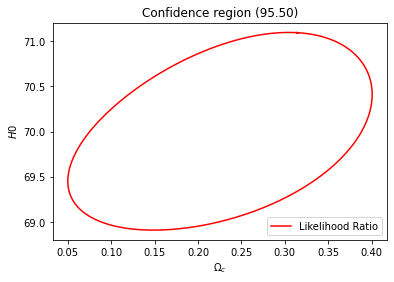

In [4]:
#Plot: confidance region for 2 sigma
plt.title ("Confidence region (%.2f)" % (cr_rg.clevel * 100.0))
plt.plot (cr_p1array, cr_p2array, 'r', label="Likelihood Ratio")
plt.xlabel(r'$\Omega_c$')
plt.ylabel(r'$H0$')

plt.legend(loc=4)

In [5]:
#PIndex indicating which parameter we are going to study
p1 = Ncm.MSetPIndex.new (cosmo.id (), Nc.HICosmoDESParams.OMEGA_C)
p2 = Ncm.MSetPIndex.new (cosmo.id (), Nc.HICosmoDESParams.OMEGA_X)

#Likelihood ratio test object
lhr2d = Ncm.LHRatio2d.new (fit, p1, p2, 1.0e-2)

#Confidance region (from likelihood ratio test)
cr_rg = lhr2d.conf_region (0.955, 300.0, Ncm.FitRunMsgs.SIMPLE)

cr_p1array = cr_rg.p1.dup_array ()
cr_p2array = cr_rg.p2.dup_array ()

#----------------------------------------------------------------------------------
# Likelihood ratio confidence region at 95.500%, bestfit [  0.23581023   0.72510508]:
#
#  looking root in interval [           0    2.4904188]:
#...
#  root found at     2.321904 with precision 1.00000000e-02.
#  border found at     2.321904.
#.
#  looking root in interval [   7.0669608    8.6377572]:
#..
#  root found at    7.8627727 with precision 1.00000000e-02.
#  looking root in interval [   7.0773746    8.6481709]:
#..
#  root found at    7.8812389 with precision 1.00000000e-02.
#  looking root in interval [   7.0958408    8.6666371]:
#..
#  root found at    7.8994255 with precision 1.00000000e-02.
#  looking root in interval [   7.1140273    8.6848236]:
#..
#  root found at    7.9177634 with precision 1.00000000e-02.
#  looking root in interval [   7.1323653    8.7031616]:
#...
#  root found at    7.9361902 with precision 1.00000000e-02.
#  looking root in interval [   7.1507921    8.7215884]:
#

#..
#  root found at    9.1859396 with precision 1.00000000e-02.
#  looking root in interval [   8.4005414    9.9713377]:
#..
#  root found at    9.2096835 with precision 1.00000000e-02.
#  looking root in interval [   8.4242854    9.9950817]:
#..
#  root found at     9.233359 with precision 1.00000000e-02.
#  looking root in interval [   8.4479609    10.018757]:
#..
#  root found at    9.2569384 with precision 1.00000000e-02.
#  looking root in interval [   8.4715403    10.042337]:
#..
#  root found at    9.2804468 with precision 1.00000000e-02.
#  looking root in interval [   8.4950486    10.065845]:
#..
#  root found at    9.3038565 with precision 1.00000000e-02.
#  looking root in interval [   8.5184583    10.089255]:
#..
#  root found at    9.3271553 with precision 1.00000000e-02.
#  looking root in interval [   8.5417572    10.112554]:
#..
#  root found at    9.3503294 with precision 1.00000000e-02.
#  looking root in interval [   8.5649312    10.135728]:
#..
#  root found at    

#  looking root in interval [   9.7460877    11.316884]:
#..
#  root found at    10.551088 with precision 1.00000000e-02.
#  looking root in interval [     9.76569    11.336486]:
#..
#  root found at    10.570905 with precision 1.00000000e-02.
#  looking root in interval [    9.785507    11.356303]:
#..
#  root found at    10.590665 with precision 1.00000000e-02.
#  looking root in interval [   9.8052669    11.376063]:
#..
#  root found at    10.610799 with precision 1.00000000e-02.
#  looking root in interval [   9.8254009    11.396197]:
#..
#  root found at    10.631001 with precision 1.00000000e-02.
#  looking root in interval [   9.8456026    11.416399]:
#..
#  root found at    10.651398 with precision 1.00000000e-02.
#  looking root in interval [   9.8659997    11.436796]:
#..
#  root found at    10.671904 with precision 1.00000000e-02.
#  looking root in interval [   9.8865062    11.457302]:
#..
#  root found at    10.692634 with precision 1.00000000e-02.
#  looking root in inter

#..
#  root found at    12.033886 with precision 1.00000000e-02.
#  looking root in interval [   11.248488    12.819284]:
#..
#  root found at    12.052893 with precision 1.00000000e-02.
#  looking root in interval [   11.267495    12.838291]:
#..
#  root found at    12.071766 with precision 1.00000000e-02.
#  looking root in interval [   11.286368    12.857164]:
#..
#  root found at    12.090515 with precision 1.00000000e-02.
#  looking root in interval [   11.305117    12.875913]:
#..
#  root found at    12.109144 with precision 1.00000000e-02.
#  looking root in interval [   11.323746    12.894542]:
#..
#  root found at    12.127652 with precision 1.00000000e-02.
#  looking root in interval [   11.342254     12.91305]:
#..
#  root found at     12.14605 with precision 1.00000000e-02.
#  looking root in interval [   11.360652    12.931448]:
#..
#  root found at    12.164387 with precision 1.00000000e-02.
#  looking root in interval [   11.378989    12.949785]:
#..
#  root found at    

#  looking root in interval [   12.620655    14.191452]:
#..
#  root found at    13.430198 with precision 1.00000000e-02.
#  looking root in interval [     12.6448    14.215596]:
#..
#  root found at    13.454168 with precision 1.00000000e-02.
#  looking root in interval [    12.66877    14.239566]:
#..
#  root found at    13.478097 with precision 1.00000000e-02.
#  looking root in interval [   12.692699    14.263495]:
#..
#  root found at    13.501888 with precision 1.00000000e-02.
#  looking root in interval [    12.71649    14.287286]:
#..
#  root found at    13.526588 with precision 1.00000000e-02.
#  looking root in interval [    12.74119    14.311986]:
#..
#  root found at    13.547987 with precision 1.00000000e-02.
#  looking root in interval [   12.762588    14.333385]:
#..
#  root found at    13.572434 with precision 1.00000000e-02.
#  looking root in interval [   12.787036    14.357832]:
#..
#  root found at    13.595565 with precision 1.00000000e-02.
#  looking root in inter

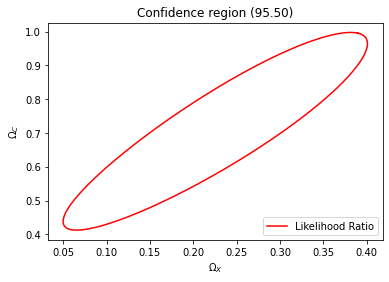

In [6]:
#Plot: confidance region for 2 sigma
plt.title ("Confidence region (%.2f)" % (cr_rg.clevel * 100.0))
plt.plot (cr_p1array, cr_p2array, 'r', label="Likelihood Ratio")
plt.xlabel(r'$\Omega_X$')
plt.ylabel(r'$\Omega_C$')

plt.legend(loc=4)

In [ ]:
#PIndex indicating which parameter we are going to study
p1 = Ncm.MSetPIndex.new (cosmo.id (), Nc.HICosmoDESParams.OMEGA_X)
p2 = p2 = Ncm.MSetPIndex.new (cosmo.id (), Nc.HICosmoDESParams.H0)

#Likelihood ratio test object
lhr2d = Ncm.LHRatio2d.new (fit, p1, p2, 1.0e-2)

#Confidance region (from likelihood ratio test)
cr_rg = lhr2d.conf_region (0.955, 300.0, Ncm.FitRunMsgs.SIMPLE)

cr_p1array = cr_rg.p1.dup_array ()
cr_p2array = cr_rg.p2.dup_array ()

#----------------------------------------------------------------------------------
# Likelihood ratio confidence region at 95.500%, bestfit [  0.72510508    70.008748]:
#
#  looking root in interval [           0    2.4904188]:
#....
#  root found at    2.4625761 with precision 1.00000000e-02.
#  border found at    2.4625761.
#.
#  looking root in interval [   7.0669608    8.6377572]:
#..
#  root found at    7.9514307 with precision 1.00000000e-02.
#  looking root in interval [   7.1660326    8.7368289]:
#..
#  root found at    7.9722749 with precision 1.00000000e-02.
#  looking root in interval [   7.1868768    8.7576731]:
#..
#  root found at     7.997057 with precision 1.00000000e-02.
#  looking root in interval [   7.2116588    8.7824552]:
#..
#  root found at    8.0201454 with precision 1.00000000e-02.
#  looking root in interval [   7.2347472    8.8055436]:
#..
#  root found at    8.0430449 with precision 1.00000000e-02.
#  looking root in interval [   7.2576468    8.8284431]:
#

#..
#  root found at    9.1822326 with precision 1.00000000e-02.
#  looking root in interval [   8.3968344    9.9676307]:
#..
#  root found at    9.2034414 with precision 1.00000000e-02.
#  looking root in interval [   8.4180432    9.9888395]:
#..
#  root found at    9.2249292 with precision 1.00000000e-02.
#  looking root in interval [   8.4395311    10.010327]:
#..
#  root found at    9.2465589 with precision 1.00000000e-02.
#  looking root in interval [   8.4611607    10.031957]:
#..
#  root found at    9.2685289 with precision 1.00000000e-02.
#  looking root in interval [   8.4831308    10.053927]:
#..
#  root found at    9.2907261 with precision 1.00000000e-02.
#  looking root in interval [    8.505328    10.076124]:
#..
#  root found at    9.3131458 with precision 1.00000000e-02.
#  looking root in interval [   8.5277477    10.098544]:
#..
#  root found at    9.3358055 with precision 1.00000000e-02.
#  looking root in interval [   8.5504073    10.121204]:
#..
#  root found at    

#  looking root in interval [   9.8843213    11.455118]:
#..
#  root found at    10.687435 with precision 1.00000000e-02.
#  looking root in interval [   9.9020367    11.472833]:
#..
#  root found at    10.704943 with precision 1.00000000e-02.
#  looking root in interval [   9.9195445    11.490341]:
#..
#  root found at    10.722506 with precision 1.00000000e-02.
#  looking root in interval [   9.9371076    11.507904]:
#..
#  root found at     10.73997 with precision 1.00000000e-02.
#  looking root in interval [   9.9545723    11.525369]:
#..
#  root found at    10.757433 with precision 1.00000000e-02.
#  looking root in interval [   9.9720344    11.542831]:
#..
#  root found at    10.774786 with precision 1.00000000e-02.
#  looking root in interval [   9.9893878    11.560184]:
#..
#  root found at    10.792178 with precision 1.00000000e-02.
#  looking root in interval [    10.00678    11.577576]:
#..
#  root found at    10.809599 with precision 1.00000000e-02.
#  looking root in inter

#..
#  root found at    12.103828 with precision 1.00000000e-02.
#  looking root in interval [    11.31843    12.889226]:
#..
#  root found at    12.128206 with precision 1.00000000e-02.
#  looking root in interval [   11.342808    12.913605]:
#..
#  root found at    12.152387 with precision 1.00000000e-02.
#  looking root in interval [   11.366989    12.937785]:
#..
#  root found at    12.176358 with precision 1.00000000e-02.
#  looking root in interval [    11.39096    12.961757]:
#..
#  root found at    12.200112 with precision 1.00000000e-02.
#  looking root in interval [   11.414714     12.98551]:
#..
#  root found at    12.223629 with precision 1.00000000e-02.
#  looking root in interval [   11.438231    13.009027]:
#..
#  root found at    12.246912 with precision 1.00000000e-02.
#  looking root in interval [   11.461513     13.03231]:
#..
#  root found at        12.27 with precision 1.00000000e-02.
#  looking root in interval [   11.484602    13.055398]:
#..
#  root found at    

#  looking root in interval [   12.617918    14.188714]:
#..
#  root found at    13.424442 with precision 1.00000000e-02.
#  looking root in interval [   12.639044     14.20984]:
#..
#  root found at     13.44587 with precision 1.00000000e-02.
#  looking root in interval [   12.660471    14.231268]:
#..
#  root found at    13.467573 with precision 1.00000000e-02.
#  looking root in interval [   12.682175    14.252971]:
#..
#  root found at    13.489595 with precision 1.00000000e-02.
#  looking root in interval [   12.704197    14.274993]:
#..
#  root found at    13.511742 with precision 1.00000000e-02.
#  looking root in interval [   12.726343     14.29714]:
#..
#  root found at    13.534361 with precision 1.00000000e-02.
#  looking root in interval [   12.748963    14.319759]:
#..
#  root found at     13.55706 with precision 1.00000000e-02.
#  looking root in interval [   12.771661    14.342458]:
#..
#  root found at    13.580156 with precision 1.00000000e-02.
#  looking root in inter

In [ ]:
#Plot: confidance region for 2 sigma
plt.title ("Confidence region (%.2f)" % (cr_rg.clevel * 100.0))
plt.plot (cr_p1array, cr_p2array, 'r', label="Likelihood Ratio")
plt.xlabel(r'$\Omega_X$')
plt.ylabel(r'$H0$')

plt.legend(loc=4)